<a href="https://colab.research.google.com/github/AutoViML/Auto_ViML/blob/master/Auto_ViML_Demo.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
datapath = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/'

In [2]:
####   THIS SHOULD print Version Number. If it doesn't, it means you don't have latest version ## 
### If you want to see the sitepackages version use this
from autoviml.Auto_ViML import Auto_ViML

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/jupyter/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/jupyter/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/jupyter/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/jupyter/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/jupyter/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/jupyter/nltk_data...
[nltk_data]    |   Package movie_reviews is already

Imported Auto_NLP version: 0.0.36.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


Using TensorFlow backend.


Imported Auto_ViML version: 0.1.629. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            
To remove previous versions, perform 'pip uninstall autoviml'
To get the latest version, perform "pip install autoviml --no-cache-dir --ignore-installed"


In [5]:
df = pd.read_csv(datapath+'titanic.csv')
#test = train[-15:]
#test = pd.read_csv(datapath+'test.csv')
print(train.shape)
#print(test.shape)
print(train.head())
target = 'Survived'

(887, 8)
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  Fare  
0    male 22.00                        1                        0  7.25  
1  female 38.00                        1                        0 71.28  
2  female 26.00                        0                        0  7.92  
3  female 35.00                        1                        0 53.10  
4    male 35.00                        0                        0  8.05  


In [6]:
num = int(0.9*df.shape[0])
train = df[:num]
test = df[num:]
sample_submission=''
scoring_parameter = 'balanced-accuracy'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (798, 8)
    Training Set Memory Usage = 0.05 MB
Test Set Shape = (89, 8)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['Survived']
Shuffling the data set before training
 Class  -> Counts -> Percent
     0:     489  ->   61.3%
     1:     309  ->   38.7%
Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
    Target Survived is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time

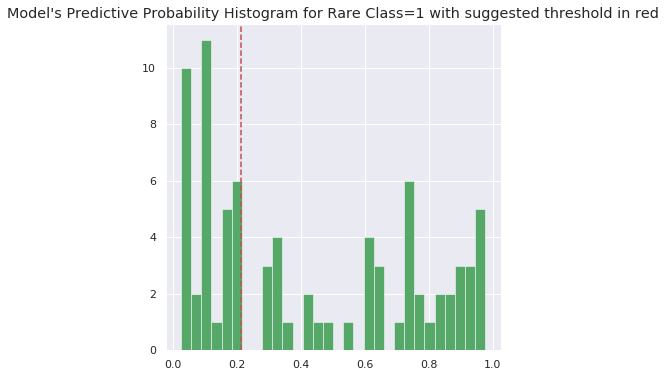

    Using threshold=0.5. However, 0.212 provides better F1=0.85 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 83.8%
Balanced Accuracy = 81.90% with Threshold = 0.50
Confusion Matrix:
[[39  6]
 [ 8 27]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        45
           1       0.82      0.77      0.79        35

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80

Balanced Accuracy = 86.67% with Threshold = 0.21
Confusion Matrix:
[[33 12]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        45
           1       0.74      1.00      0.85        35

    accuracy                           0.85        80
   macro avg       0.87      0.87      0.85        

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 85.238%
              precision    recall  f1-score   support

           0       0.97      0.73      0.84        45
           1       0.74      0.97      0.84        35

    accuracy                           0.84        80
   macro avg       0.85      0.85      0.84        80
weighted avg       0.87      0.84      0.84        80

[[33 12]
 [ 1 34]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


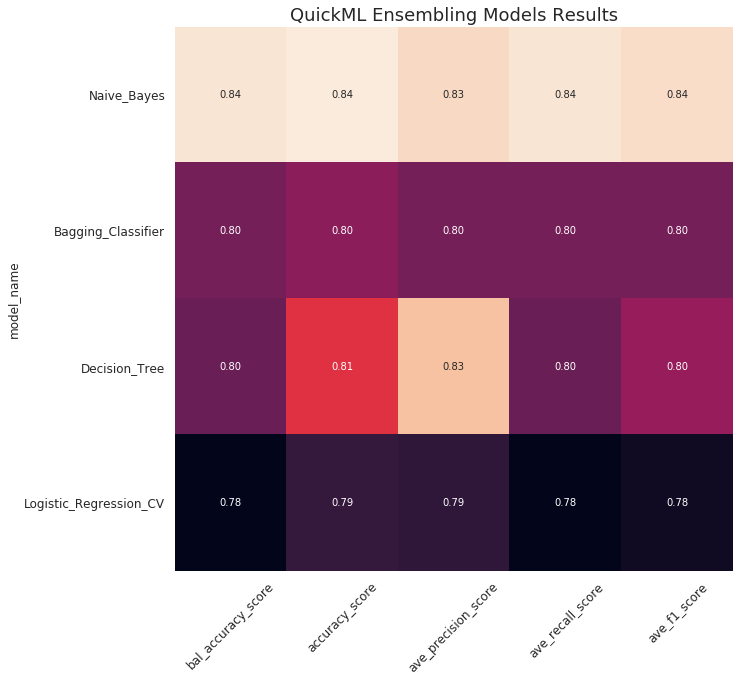

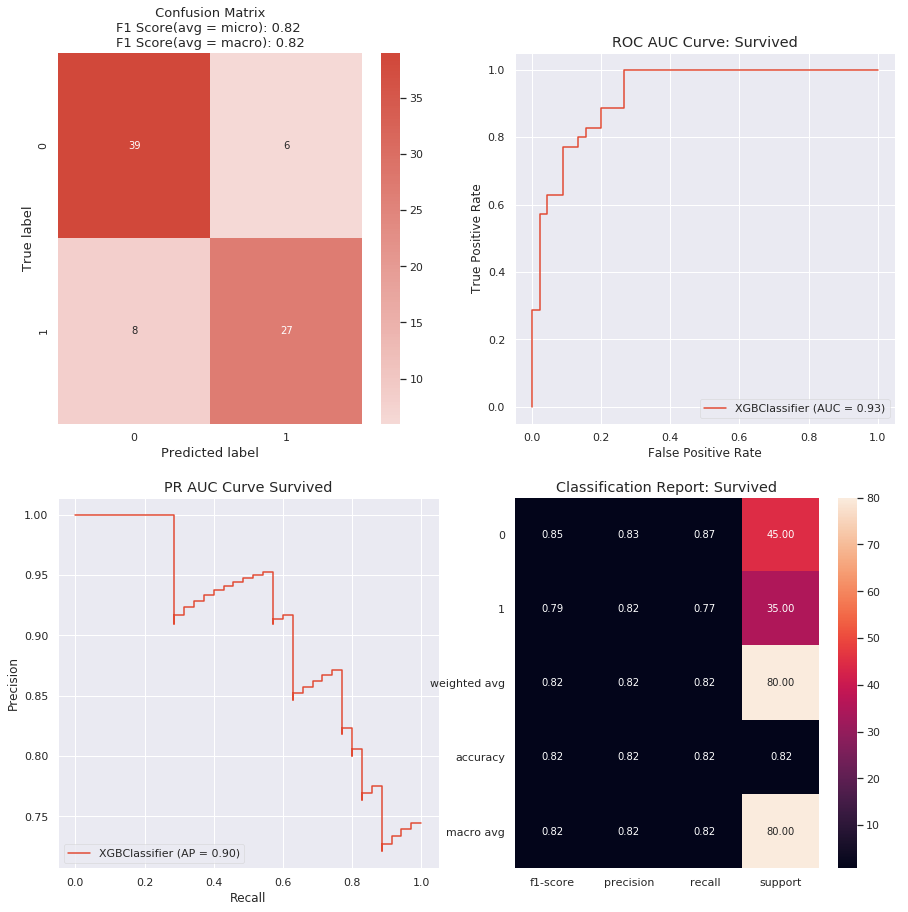

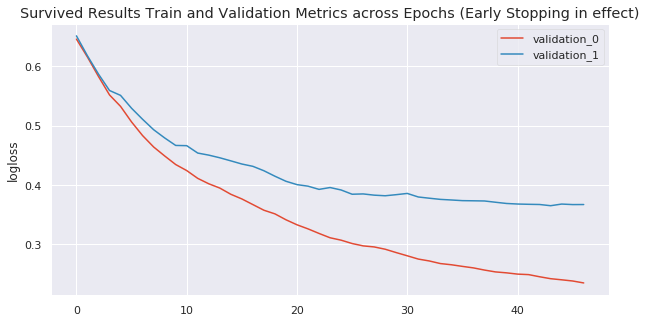

    Time taken for this Target (in seconds) = 10
Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T  #################
    Time taken for this Target (in seconds) = 13
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
Actual Training time taken in seconds = 0
    Making test Data predictions using modified Threshold = 0.212
    Calculating weighted average ensemble of 5 classifiers
Writing Output files to disk...
    Saving predictions to ./Survived/Survived_Binary_Classification_test_modified.csv
    Saving predictions to ./Survived/Survived_Binary_Classification_submission.csv
    Saving predictions to ./Survived/Survived_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 0.2 for the Entire Process


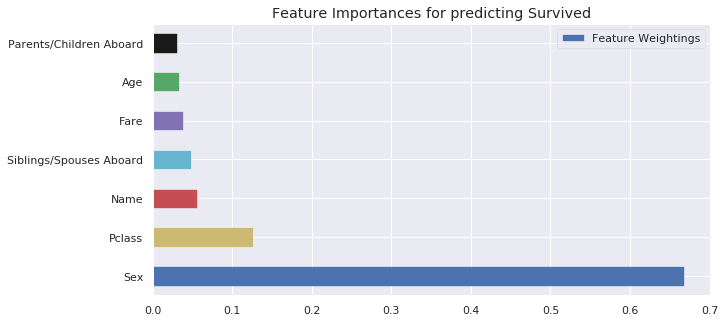

In [7]:
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)                      

In [15]:
def reverse_dict(map_dict):
    return dict([(v,k) for (k,v) in map_dict.items()])
# Use this to Test Classification Problems Only ####
ret_dict = {0: 0, 1: 1}
map_dict = reverse_dict(ret_dict)
m_thresh = 0.21
modelname='XGBoost'
#####################################################################
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
try:
    print('Normal Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values)))
    print('Test results since target variable is present in test data:')
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print('Modified Threshold Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values)))
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
except:
    print('No target variable present in test data. No results')


Normal Balanced Accuracy = 84.04%
Test results since target variable is present in test data:
[[50  6]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        56
           1       0.81      0.79      0.80        33

    accuracy                           0.85        89
   macro avg       0.84      0.84      0.84        89
weighted avg       0.85      0.85      0.85        89

Modified Threshold Balanced Accuracy = 79.03%
[[41 15]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        56
           1       0.65      0.85      0.74        33

    accuracy                           0.78        89
   macro avg       0.77      0.79      0.77        89
weighted avg       0.80      0.78      0.78        89

